<a href="https://colab.research.google.com/github/gankidisaicharan/Alzheimers-Disease-Prediction/blob/main/AlzPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = '/content/drive/MyDrive/PROJECTS/Alzheimers disease prediction/Alzheimer Dataset ( 4 class of Images)/train'
#class_names=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['MildDemented' 'ModerateDemented' 'NonDemented' 'VeryMildDemented']


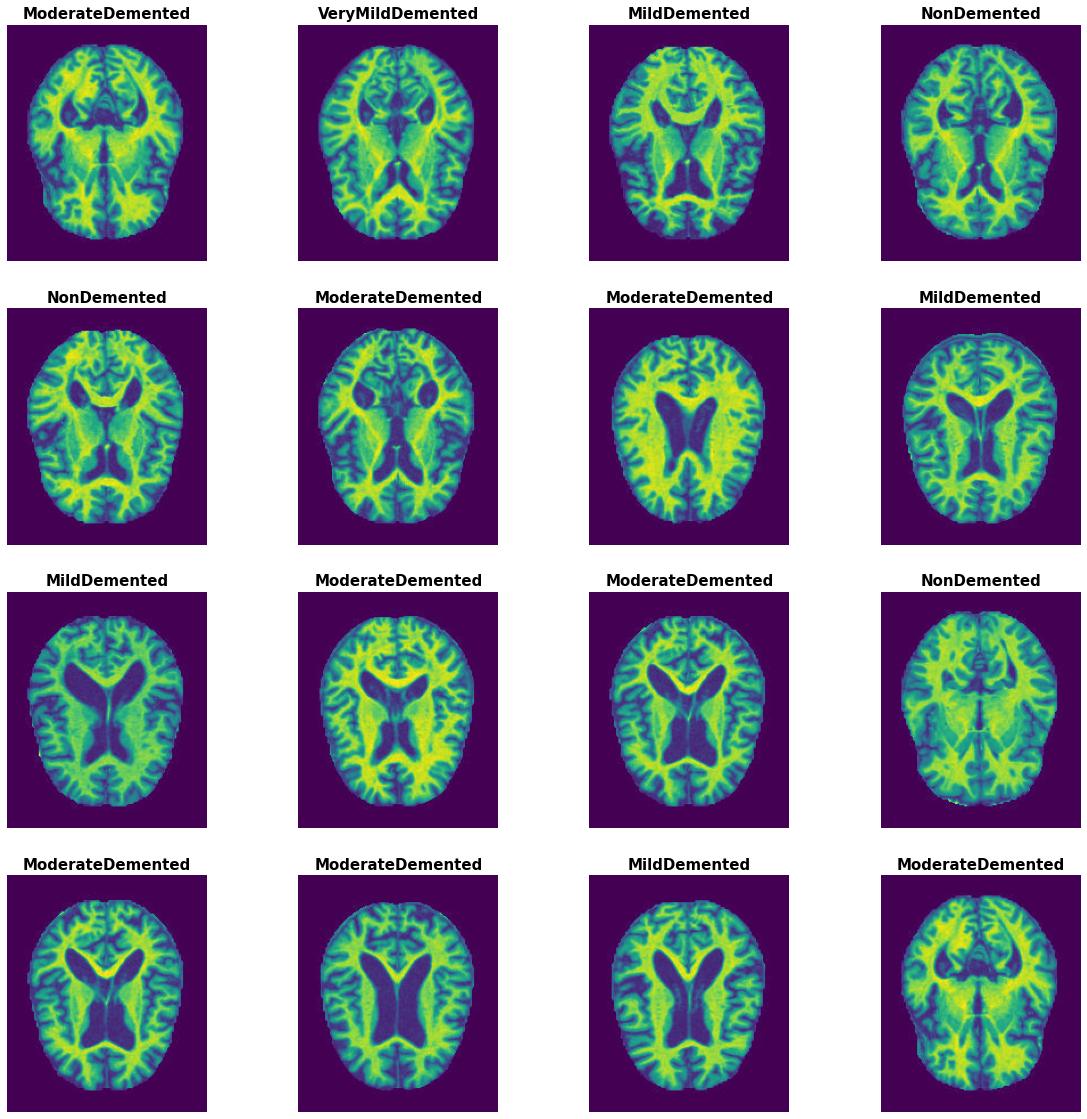

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0, 3)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 15, fontweight = 'bold')
    plt.imshow(image)

In [ ]:
SEED = 1   # maybe can do with random seed generator and compare results with different seed values in the future.
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

X_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'training'
)

X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'validation'
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [ ]:
X_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))




In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
# Set the hyperparameters
learning_rate = 0.0001
num_epochs = 30
early_stop_patience = 10

In [ ]:
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
# Set up callbacks for the training process
log_dir = 'logs/'
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
model_filepath='/content/drive/MyDrive/PROJECTS/Brain tumor detection/brain_tumor_dataset/model-{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpoint = ModelCheckpoint(model_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
early_stop_callback = EarlyStopping(monitor='val_loss', patience=early_stop_patience)

In [ ]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
history = model.fit(X_train,epochs=num_epochs, validation_data=X_validation,verbose=1,callbacks=[tb_callback,checkpoint, reduce_lr_callback, early_stop_callback])

Epoch 1/30
129/129 [==============================] - ETA: 0s - loss: 1.0134 - accuracy: 0.5099
Epoch 1: val_accuracy improved from -inf to 0.49805, saving model to /content/drive/MyDrive/PROJECTS/Brain tumor detection/brain_tumor_dataset/model-01-0.4980.hdf5
129/129 [==============================] - 712s 5s/step - loss: 1.0134 - accuracy: 0.5099 - val_loss: 0.9886 - val_accuracy: 0.4980 - lr: 1.0000e-04
Epoch 2/30
128/129 [============================>.] - ETA: 0s - loss: 0.9214 - accuracy: 0.5608
Epoch 2: val_accuracy improved from 0.49805 to 0.58887, saving model to /content/drive/MyDrive/PROJECTS/Brain tumor detection/brain_tumor_dataset/model-02-0.5889.hdf5
129/129 [==============================] - 4s 32ms/step - loss: 0.9214 - accuracy: 0.5607 - val_loss: 0.9030 - val_accuracy: 0.5889 - lr: 1.0000e-04
Epoch 3/30
129/129 [==============================] - ETA: 0s - loss: 0.8762 - accuracy: 0.5956
Epoch 3: val_accuracy did not improve from 0.58887
129/129 [=======================

In [ ]:
model_evaluate = model.evaluate(X_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

32/32 [==============================] - 1s 17ms/step - loss: 0.1420 - accuracy: 0.9561
Accuracy: % 95.61
Loss: % 14.20


[]

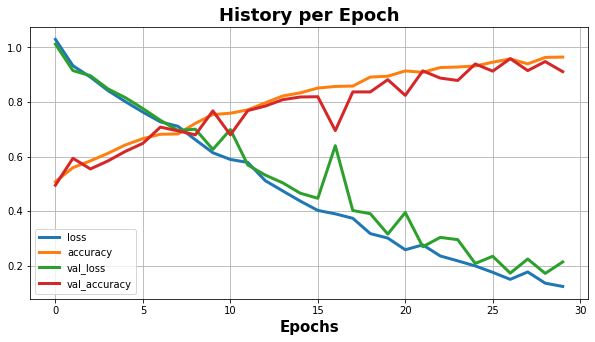

In [ ]:
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('History per Epoch', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax.plot()

1/1 [==============================] - 0s 20ms/step


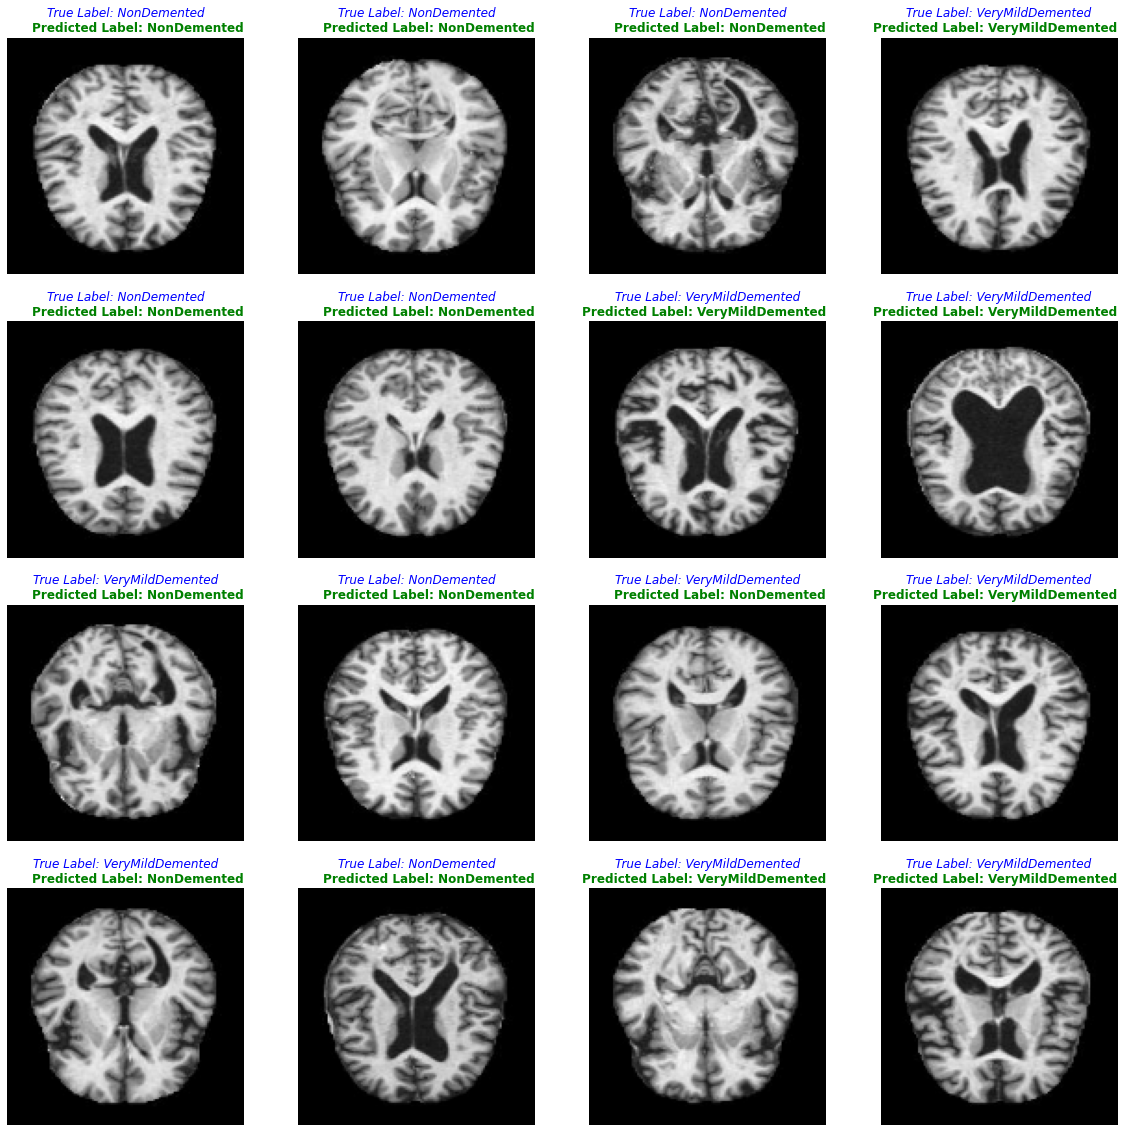

In [ ]:
plt.figure(figsize=(20, 20))
for image, label in X_validation.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        plt.axis('off')
        plt.title("True Label: " + class_names[label[i]]+'\n', fontsize=12, style='italic', color='blue', loc='center')
        plt.title("Predicted Label: " + class_names[predicted_class], fontsize=12, fontweight='bold', color='green', loc='right')
        plt.imshow(image[i].numpy().astype("uint8"))

In [ ]:
model.save('/content/drive/MyDrive/PROJECTS/Alzheimers disease prediction/my_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/PROJECTS/Alzheimers disease prediction/my_model.h5')

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 K

In [ ]:
import gradio as gr
import cv2


# Define a function to run the model on user input and return predictions
def predict_image(img_array):
    img_array = cv2.resize(img_array, (128, 128))
    img_array = np.array(img_array).reshape(1, 128, 128, 3)
    prediction = model.predict([img_array])
    class_idx = np.argmax(prediction)
    class_name = class_names[class_idx]
    return class_name

# Define the input and output components of the Gradio interface
inputs = gr.inputs.Image(shape=(128, 128))
outputs = gr.outputs.Label(num_top_classes=len(class_names))

# Create the Gradio interface
interface = gr.Interface(fn=predict_image, inputs=inputs, outputs=outputs,
                         title='Alzheimer\'s Disease Prediction',
                         description='Upload an image and the model will predict whether it shows signs of Alzheimer\'s disease or not.')

# Launch the interface
interface.launch(share=True,debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://227bf62ad7ab5ce150.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 80ms/step
